# Convolution and Cross-Correlation in Digital Signal Processing

This notebook demonstrates:
- **Convolution**: A mathematical operation that combines two signals to produce a third signal
- **Cross-Correlation**: Measures the similarity between two signals as a function of time lag

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Import Required Libraries

In [ ]:
def convolve(x, h):
    """
    Compute the discrete linear convolution of two sequences.
    
    Parameters:
        x: First input sequence (signal)
        h: Second input sequence (impulse response)
    
    Returns:
        y: Convolution result with length = len(x) + len(h) - 1
    """
    len_x = len(x)
    len_h = len(h)
    len_y = len_x + len_h - 1  # Output length formula
    y = [0] * len_y  # Initialize output array with zeros

    # Perform convolution using the sum formula
    for i in range(len_y):
        for k in range(len_x):
            # Check bounds to ensure valid index for h
            if(i - k >= 0 and i - k < len_h):
                y[i] += x[k] * h[i - k]
    
    return y

## Convolution Function

The convolution of two discrete signals x[n] and h[n] is defined as:

$$y[n] = x[n] * h[n] = \sum_{k=-\infty}^{\infty} x[k] \cdot h[n-k]$$

The output length of convolution is: `len(x) + len(h) - 1`

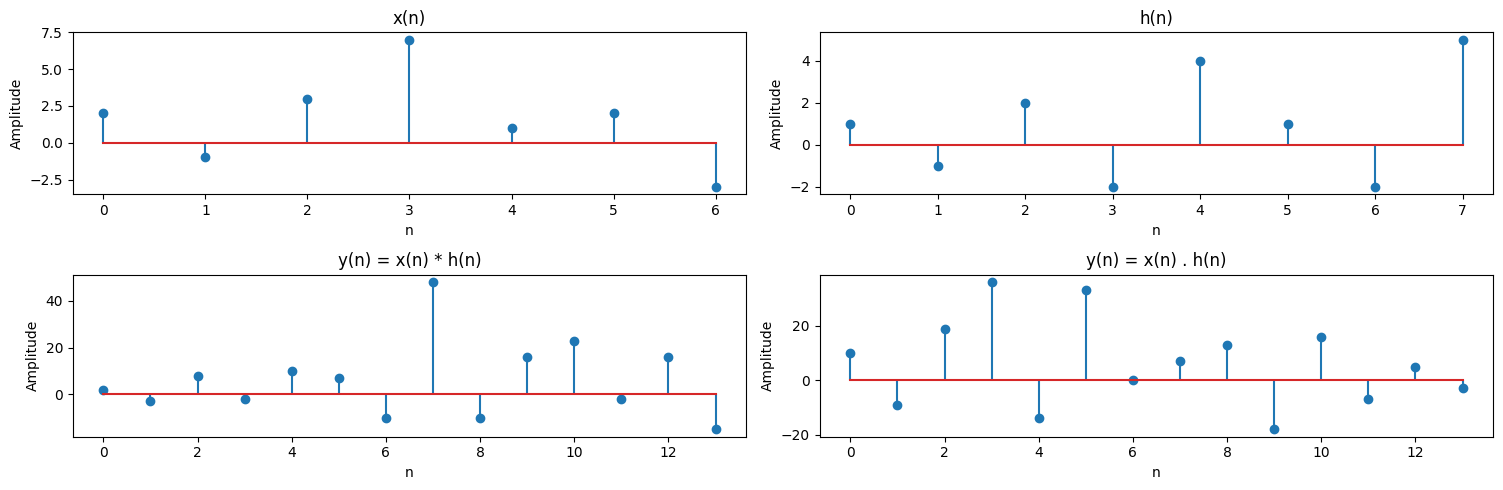

In [ ]:
# Define input signals
x = [2, -1, 3, 7, 1, 2, -3]   # Input signal x[n]
h = [1, -1, 2, -2, 4, 1, -2, 5]  # Impulse response h[n]

# Create a figure with 2x2 subplots
plt.figure(figsize=(15, 5))

# Plot 1: Input signal x[n]
plt.subplot(2, 2, 1)
plt.stem(x)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('x(n) - Input Signal')

# Plot 2: Impulse response h[n]
plt.subplot(2, 2, 2)
plt.stem(h)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('h(n) - Impulse Response')

# Plot 3: Convolution result y[n] = x[n] * h[n]
y = convolve(x, h)
plt.subplot(2, 2, 3)
plt.stem(y)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('y(n) = x(n) * h(n) [Convolution]')

# Plot 4: Cross-correlation y[n] = x[n] ⊛ h[n]
# Cross-correlation is convolution with time-reversed h[n]
y = convolve(x, h[::-1])  # h[::-1] reverses the sequence
plt.subplot(2, 2, 4)
plt.stem(y)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('y(n) = x(n) ⊛ h(n) [Cross-Correlation]')

plt.tight_layout()
plt.show()